In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import os 
import pandas as pd

from collections import Counter

import warnings
warnings.filterwarnings(action='ignore')

import time

In [2]:
# 데이터프레임 행 중간에 자르지않고 다 보기
pd.set_option('display.max_rows',None)

In [3]:
# 데이터프레임 열 중간에 자르지않고 다 보기
pd.set_option('display.max_columns',None)

In [4]:
# 최대 10행보기
pd.set_option('max_r', 10)

In [2]:
vehicle_raw = pd.read_csv('vehicles.csv')

In [3]:
vehicle_raw.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [4]:
# 데이터 정의서에서 county: useless column left in by mistake -> county 변수 삭제
vehicle_raw = vehicle_raw.drop('county',axis=1)

In [5]:
# 인덱스 0~26 -> id, url, region price 외에 변수 모두 결측 => 삭제
vehicle = vehicle_raw.drop(range(0,27),axis=0)
vehicle = vehicle.reset_index(drop=True)

In [6]:
vehicle.shape

(426853, 25)

- VIN : 차량고유번호

     
- 결측치 + VIN이 한 개 이상인 애들 + VIN이 한 개인 애들
- 161015 + 187854(40280) + 77984 = 426853


- 같은 VIN = 지역 빼고 모두 같은 값 가짐 = 지역 처리  
- ex) (aaa, LA),(aaa, NY) → (aaa, LA & NY)
   
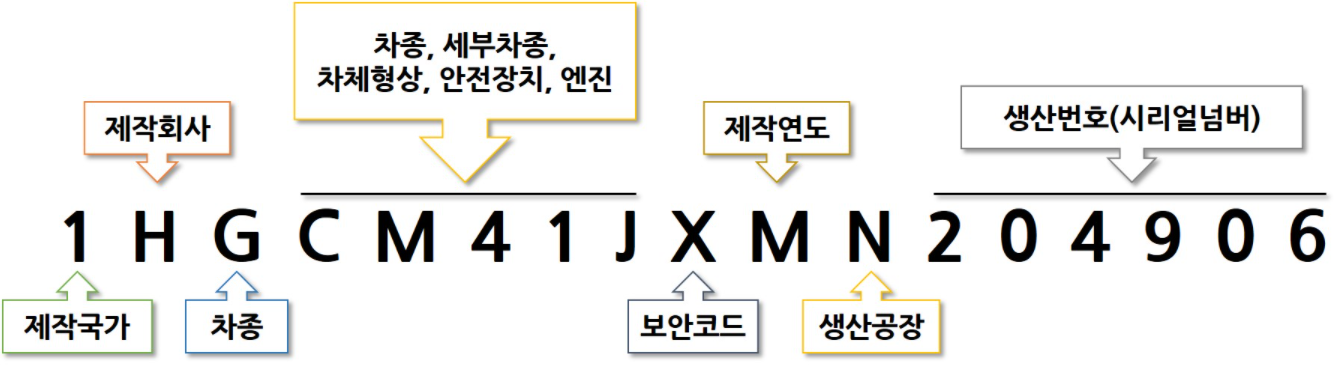

In [62]:
vehicle.VIN.value_counts()

1FMJU1JT1HEA52352    261
3C6JR6DT3KG560649    235
1FTER1EH1LLA36301    231
5TFTX4CN3EX042751    227
1GCHTCE37G1186784    214
                    ... 
2G4GP5EX5E9213578      1
1GCEK19J78Z219711      1
JA4AT3AW1AZ006543      1
4T1BF28B61U153724      1
SAJGX2749VCOO8376      1
Name: VIN, Length: 118264, dtype: int64

In [85]:
VIN_unique = vehicle.VIN.unique()
temp_columns = 'price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color'.split(',')

VIN_to_check = []
for i1 in VIN_unique:
    temp = vehicle.loc[vehicle['VIN'] == i1]
    temp = temp[temp_columns]
    
    sum = 0
    for i2 in range(temp.columns.size):
        sum += temp.iloc[:,i2].unique().size
    
    if sum != 14:
        VIN_to_check.append(i1)

In [90]:
VIN_to_check

[nan,
 '1C4GJXAN4LW180633',
 'JM1NDAC74L0413665',
 '1FATP8FF5J5115190',
 'SADFJ2FX1J1Z13468',
 'KL4MMGSL4LB128069',
 '5N1AL0MM5FC519184',
 'JTNKARJEXGJ517925',
 '2HNYD2H30DH510846',
 'WAUC8AFC6JN041814',
 '1GKKNLLS2JZ178034',
 'SADFP2FX0J1Z05358',
 '5N1DL0MN9LC508268',
 'WA1ANAFY2J2198475',
 'JTNKARJE4GJ508198',
 '1C4BJWDG5CL258372',
 '1LN6L9TP1J5605689',
 '5XXGN4A77DG230383',
 'JTDBT123520243495',
 '1G1YC3DW6A5101146',
 '1G6DC67A350157025',
 '1G4HR54K6YU316195',
 '1G1AF5F59A7187839',
 'YV1RS592192724102',
 'KMHE54L2XHA065127',
 '1G4HR52KXVH453440',
 '1FTMF1CM6BKD55331',
 '2T2GK31U57C025466',
 '1FD7W2B61CEC39375',
 '1J8GL48K06W123802',
 '1GC1KWEYXJF108821',
 '2G1FB1E38F9300602',
 '2HKRM4H77FH677160',
 '1FD7X2B65CEC58024',
 '1FD8W3G69HEB28454',
 '1GT21XEG0FZ537816',
 '1GBJG31K281131930',
 '1C3CCCBBXGN146315',
 '1FT7W2B62GED23604',
 '5GRGN23868H106669',
 '1C6HJTAGXLL119987',
 '1FTLR4FE4BPB04482',
 '1FTYR1ZM0KKA42423',
 '1GTW7AFG9K1222985',
 'NM0LS7F7XE1147431',
 'NM0LS7E71E1167911',
 'JM

In [91]:
len(VIN_unique)

118265

In [95]:
temp = vehicle.loc[vehicle['VIN'] == 'JM1NDAC74L0413665'][temp_columns]

In [101]:
[temp[i].unique() for i in temp]

[array([31590], dtype=int64),
 array([2020.]),
 array(['mazda'], dtype=object),
 array(['mx-5 miata club'], dtype=object),
 array(['good'], dtype=object),
 array([nan], dtype=object),
 array(['gas'], dtype=object),
 array([2195.]),
 array(['clean'], dtype=object),
 array(['other'], dtype=object),
 array(['rwd'], dtype=object),
 array([nan], dtype=object),
 array(['other', 'convertible'], dtype=object),
 array([nan], dtype=object)]

In [41]:
#vehicle[['VIN','region']]

In [38]:
# 결측치 확인

(vehicle.isnull().sum()) # /(vehicle.size)

id                   0
url                  0
region               0
region_url           0
price                0
year              1178
manufacturer     17619
model             5250
condition       174077
cylinders       177651
fuel              2986
odometer          4373
title_status      8215
transmission      2529
VIN             161015
drive           130540
size            306334
type             92831
paint_color     130176
image_url           41
description         43
state                0
lat               6522
long              6522
posting_date        41
dtype: int64

<AxesSubplot:>

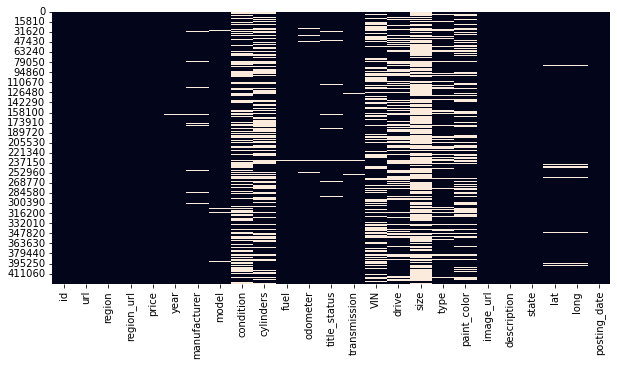

In [11]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.heatmap(vehicle.isnull(), cbar=False) 